In [1]:
import nltk

In [2]:
def is_var_or_const(x):
    return x in ['x','y','z','0']

elementary_number_theory_grammar = nltk.CFG.fromstring("""
S -> FORALL
S -> IMPLIES
S -> NOT
S -> ATOMIC
FORALL -> 'forall' VARIABLE S
IMPLIES -> '(' S '->' S ')'
NOT -> '(' 'not' S ')'
ATOMIC -> PD_LESS_THAN
ATOMIC -> PD_EQUALS
PD_LESS_THAN -> '<' TERM TERM
PD_EQUALS -> '=' TERM TERM
TERM -> FN_SUCC
TERM -> FN_PLUS
TERM -> FN_TIMES
TERM -> FN_EXP
TERM -> VARIABLE
TERM -> CONSTANT_ZERO
FN_SUCC -> 'S' TERM
FN_PLUS -> '+' TERM TERM
FN_TIMES -> '*' TERM TERM
FN_EXP -> 'E' TERM TERM
VARIABLE -> 'x'
VARIABLE -> 'y'
VARIABLE -> 'z'
CONSTANT_ZERO -> '0'
    """)
print(elementary_number_theory_grammar)

Grammar with 25 productions (start state = S)
    S -> FORALL
    S -> IMPLIES
    S -> NOT
    S -> ATOMIC
    FORALL -> 'forall' VARIABLE S
    IMPLIES -> '(' S '->' S ')'
    NOT -> '(' 'not' S ')'
    ATOMIC -> PD_LESS_THAN
    ATOMIC -> PD_EQUALS
    PD_LESS_THAN -> '<' TERM TERM
    PD_EQUALS -> '=' TERM TERM
    TERM -> FN_SUCC
    TERM -> FN_PLUS
    TERM -> FN_TIMES
    TERM -> FN_EXP
    TERM -> VARIABLE
    TERM -> CONSTANT_ZERO
    FN_SUCC -> 'S' TERM
    FN_PLUS -> '+' TERM TERM
    FN_TIMES -> '*' TERM TERM
    FN_EXP -> 'E' TERM TERM
    VARIABLE -> 'x'
    VARIABLE -> 'y'
    VARIABLE -> 'z'
    CONSTANT_ZERO -> '0'


In [3]:
def tokenize(exp):
    """
    Returns the tokens of an expression
    """
    return exp.split()

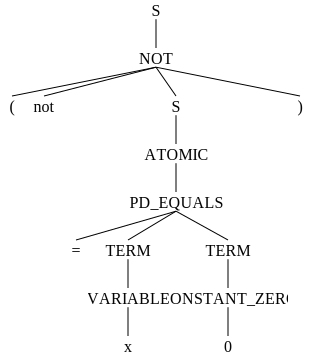

In [4]:
elementary_number_theory_parser = nltk.ChartParser(elementary_number_theory_grammar)
list(elementary_number_theory_parser.parse(tokenize("( not = x 0 )")))[0]

In [5]:
sent = "forall x ( ( not = x 0 ) -> ( not forall y ( not = x S y ) ) )"

In [6]:
tokenize(sent)

['forall',
 'x',
 '(',
 '(',
 'not',
 '=',
 'x',
 '0',
 ')',
 '->',
 '(',
 'not',
 'forall',
 'y',
 '(',
 'not',
 '=',
 'x',
 'S',
 'y',
 ')',
 ')',
 ')']

In [7]:
T = list(elementary_number_theory_parser.parse(tokenize(sent)))[0]
print(T)

(S
  (FORALL
    forall
    (VARIABLE x)
    (S
      (IMPLIES
        (
        (S
          (NOT
            (
            not
            (S
              (ATOMIC
                (PD_EQUALS
                  =
                  (TERM (VARIABLE x))
                  (TERM (CONSTANT_ZERO 0)))))
            )))
        ->
        (S
          (NOT
            (
            not
            (S
              (FORALL
                forall
                (VARIABLE y)
                (S
                  (NOT
                    (
                    not
                    (S
                      (ATOMIC
                        (PD_EQUALS
                          =
                          (TERM (VARIABLE x))
                          (TERM (FN_SUCC S (TERM (VARIABLE y)))))))
                    )))))
            )))
        )))))


In [8]:
def is_var_or_const(x):
    return x in ['x','y','z','0']

def pruneTree(tree):
    if isinstance(tree, str):
        if not is_var_or_const(tree):
            return None
        return tree
    if len(tree) == 1:
        return pruneTree(tree[0])
    children_trees = []
    for child in tree:
        child_tree = pruneTree(child)
        if child_tree is not None:
            children_trees.append(child_tree)
    return nltk.tree.Tree(tree.label(), children_trees)

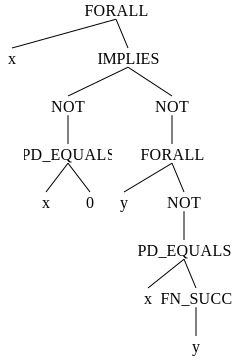

In [9]:
pruneTree(T)